# Basic data exploration with the Yelp academic datasets

You can get a Jupyter Notebook like this at http://jupyter.org/. You need Python installed - try not to use your system Python (the Python already installed on your computer) - instead, use the Anaconda distribution of Python or a Homebrew, a [package manager](https://nicoleorchard.com/blog/package-managers) for Mac, in order to use a virtual environment.

We can get ideas of how to use the data by exploring it. This means looking at the *schema*, or structure, of the data, examining what attributes are available, and visualizing it. We are going to do that.

The `json` module in Python lets us turn JSON-formatted data into Python dictionaries.

In [1]:
import json

user_data = []

with open('yelp_academic_dataset_user.json', 'r') as fhandle:
    for line in fhandle:
        user_data.append(json.loads(line))

The `with open('yelp_academic_dataset_user.json', 'r') as fhandle:` just means Python is giving us a variable called `fhandle` (like "file handle") to hold onto the file. The `with` statement lets us use resources like the file without having to manually close the resource. More on [`with`](http://effbot.org/zone/python-with-statement.htm) (click it).

In [2]:
# How much data do we have?

print("Yelp User Data Length")
print(len(user_data))

Yelp User Data Length
552339


In [3]:
# pprint lets you print out Python data structures such as dictionaries fancily

from pprint import pprint
print("Yelp User Data Example\n\n")
pprint(user_data[0])

Yelp User Data Example


{'average_stars': 4.14,
 'compliments': {'cool': 78,
                 'cute': 15,
                 'funny': 11,
                 'hot': 48,
                 'more': 3,
                 'note': 20,
                 'photos': 14,
                 'plain': 25,
                 'profile': 8,
                 'writer': 9},
 'elite': [2005, 2006],
 'fans': 70,
 'friends': ['rpOyqD_893cqmDAtJLbdog',
             '4U9kSBLuBDU391x6bxU-YA',
             'fHtTaujcyKvXglE33Z5yIw',
             '8J4IIYcqBlFch8T90N923A',
             'wy6l_zUo7SN0qrvNRWgySw',
             'HDQixQ-WZEV0LVPJlIGQeQ',
             'T4kuUr_iJiywOPdyM7gTHQ',
             'z_5D4XEIlGAPjG3Os9ix5A',
             'i63u3SdbrLsP4FxiSKP0Zw',
             'pnrGw4ciBXJ6U5QB2m0F5g',
             'ytjCBxosVSqCOQ62c4KAxg',
             'r5uiIxwJ-I-oHBkNY2Ha3Q',
             'niWoSKswEbooJC_M7HMbGw',
             'kwoxiKMyoYjB1wTCYAjYRg',
             '9A8OuP6XwLwnNb9ov3_Ncw',
             '27MmRg8LfbZXNEHkEnK

Let's look at what the other datasets look like.

In [4]:
business_data = []

with open('yelp_academic_dataset_business.json', 'r') as fhandle:
    for line in fhandle:
        business_data.append(json.loads(line))

print("Yelp Business Data Length")
print("{}\n\n".format(len(business_data)))
print("Yelp Business Data Example\n\n")
pprint(business_data[0])

review_data = []

with open('yelp_academic_dataset_review.json', 'r') as fhandle:
    for line in fhandle:
        review_data.append(json.loads(line))

print("Yelp Review Data Length")
print("{}\n\n".format(len(review_data)))
print("Yelp Review Data Example\n\n")
pprint(review_data[0])

Yelp Business Data Length
77445


Yelp Business Data Example


{'attributes': {'Accepts Credit Cards': True,
                'Alcohol': 'none',
                'Ambience': {'casual': False,
                             'classy': False,
                             'divey': False,
                             'hipster': False,
                             'intimate': False,
                             'romantic': False,
                             'touristy': False,
                             'trendy': False,
                             'upscale': False},
                'Attire': 'casual',
                'Caters': False,
                'Delivery': False,
                'Drive-Thru': False,
                'Good For': {'breakfast': False,
                             'brunch': False,
                             'dessert': False,
                             'dinner': False,
                             'latenight': False,
                             'lunch': False},
          

At this point, we have three lists, `user_data`, `business_data`, and `review_data`. We have an idea of what data attributes are available to us, and how many data points we have. We have a lot of data (2M reviews!). To develop and prototype code (or even for the final product), we probably don't need all of it (testing would be slow), so a common task is to grab N random data points from all of the data. Here is how you do that with the review data.

In [5]:
import random

# Let N be 5000. We're going to grab 5000 random data points
review_data_sample_5k = random.sample(review_data, 5000)

# Sanity check, let's print out the length of our sample
print(len(review_data_sample_5k))

# Sanity check, let's just pick an item from the list
pprint(review_data_sample_5k[10])

5000
{'business_id': 'zt1TpTuJ6y9n551sw9TaEg',
 'date': '2013-06-25',
 'review_id': 'zYmcoXvAlfjzfpoqnjFpbg',
 'stars': 4,
 'text': "I'm not a fan of buffets because I'm a believer of quality over "
         'quantity. For being a buffet, Wicked Spoon is actually pretty good. '
         "I've never seen a buffet that has roasted bone marrow! Presentation "
         'of all their foods is awesome. Nicely individual plated dishes. '
         "Dessert bar is amazing. If you're looking for a good buffet, Wicked "
         'Spoon ranks up there with the best of them in Las Vegas.',
 'type': 'review',
 'user_id': '_bBX2Gj1n69vjv8MwQMA6g',
 'votes': {'cool': 0, 'funny': 0, 'useful': 0}}


Cool. I am curious how the review scores are distributed. Let's grab all of the `stars` from our sample reviews.

In [6]:
ratings_5k = []
for review in review_data_sample_5k:
    ratings_5k.append(review['stars'])
print(ratings_5k)

[4, 5, 3, 1, 4, 1, 5, 1, 4, 3, 4, 5, 5, 5, 4, 4, 4, 5, 4, 5, 3, 5, 2, 4, 4, 5, 4, 4, 3, 2, 5, 4, 4, 5, 5, 4, 4, 5, 5, 1, 4, 4, 5, 4, 5, 4, 4, 5, 3, 5, 5, 4, 4, 4, 4, 5, 5, 3, 4, 3, 5, 4, 5, 4, 3, 5, 5, 3, 5, 3, 5, 5, 4, 1, 4, 3, 1, 5, 3, 5, 3, 5, 4, 4, 5, 5, 5, 3, 4, 4, 5, 1, 5, 3, 4, 5, 5, 5, 5, 4, 4, 5, 3, 4, 5, 5, 5, 3, 5, 4, 4, 5, 3, 4, 1, 2, 5, 5, 4, 5, 5, 1, 2, 5, 5, 5, 3, 5, 1, 5, 5, 2, 4, 4, 5, 1, 4, 4, 5, 1, 5, 3, 5, 5, 3, 5, 2, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 3, 5, 5, 5, 5, 4, 5, 5, 5, 5, 3, 2, 4, 4, 3, 5, 2, 5, 1, 3, 4, 5, 4, 1, 5, 3, 4, 5, 4, 5, 5, 2, 4, 1, 5, 5, 5, 5, 4, 3, 2, 4, 5, 3, 4, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 4, 4, 4, 5, 2, 2, 4, 3, 4, 3, 5, 5, 1, 4, 5, 4, 3, 4, 5, 5, 5, 4, 5, 2, 5, 5, 5, 3, 3, 3, 4, 1, 4, 4, 2, 1, 5, 5, 5, 2, 5, 5, 4, 5, 5, 4, 4, 3, 1, 4, 5, 4, 5, 5, 4, 3, 4, 4, 5, 5, 5, 5, 3, 4, 5, 2, 3, 3, 4, 3, 5, 3, 5, 1, 4, 4, 4, 2, 5, 5, 4, 4, 4, 5, 4, 4, 5, 4, 1, 5, 5, 5, 4, 4, 5, 3, 5, 4, 4, 3, 5, 4, 4, 5, 2, 4, 3, 4, 4, 5, 5, 5, 5, 5, 1, 5, 

Let's use a visualization package called `seaborn` to plot our data in a historgram.

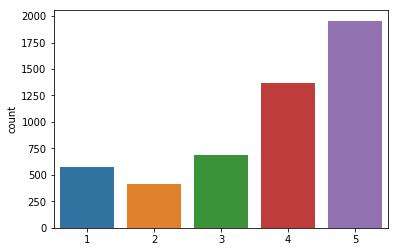

In [7]:
import seaborn as sns
# the following line is required to be able to show the plot inside the notebook
%matplotlib inline

sns.countplot(ratings_5k)

Let's see how close our sample ratings distribution was to the total ratings distribution.

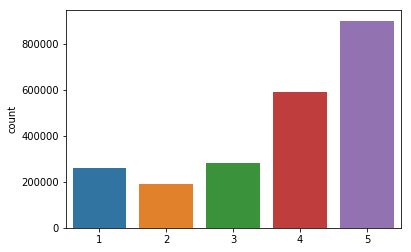

In [8]:
ratings_2m = []
for review in review_data:
    ratings_2m.append(review['stars'])
sns.countplot(ratings_2m)

Let's try out APIs to analyze text data from reviews. For this one, we'll be using [Indico.io](https://indico.io/docs), a machine learning startup founded by students at Olin College.

This is tricky because the free tier limits you to 10000 free API calls. This means we'll need to be more thoughtful when using the API. There are a few good points to follow:
1. Make sure to store the API result after each call (such as writing it immediately to a CSV)
2. Make sure to know what you passed into the API call in order to avoid asking the API to do the same work (so don't pick points completely at random without knowing what they are, and store the data you passed in *along with the result*)
3. Make sure what you're passing into the API call is what you intended to pass in (e.g., when accessing data from a deeply-nested dictionary)
4. When calling APIs within a for-loop, make sure the code you put in your for-loop won't fail out, write to a file immediately after each iteration, and handle errors gracefully.

For this example, we'll grab the first 100 reviews, perform sentiment analysis on the review, and write the results to a TSV (tab-separated values).

In [9]:
review_data_first_100 = review_data[0:100]

from math import ceil
import indicoio
# Replace this with the API key you get after making an account, and don't commit your API key in version control
indicoio.config.api_key = 'YOUR_API_KEY'

def convert_sentiment_to_yelp_rating(sentiment):
    """Takes a decimal between 0.0 and 1.0 `sentiment`
    and converts it to a number between 1 and 5, a Yelp rating.
    e.g., 0.0 < x <= 0.2 --> 1-star rating,
          0.2 < x <= 0.4 --> 2-star rating, ...
          0.8 < x <= 1.0 --> 5-star rating
    """
    assert 0.0 <= sentiment <= 1.0
    return int(ceil(sentiment*10/2))

ratings_from_dataset = []
ratings_from_sentiment = []

with open("result.tsv", "w") as fhandle:
    for review in review_data_first_100:
        # text of the review
        text = review['text'].replace('\n', ' ') # Replace newline characters with spaces
        
        # this is the API call
        sentiment = indicoio.sentiment_hq(text)
        
        # let's convert this to a 1-5 scale
        sentiment_converted = convert_sentiment_to_yelp_rating(sentiment)
        ratings_from_sentiment.append(sentiment_converted)
        
        # what the user actually rated upon writing the review
        user_rating = review['stars']
        ratings_from_dataset.append(user_rating)
        
        # let's write this to a tsv
        fhandle.write("{}\t{}\t{}\t{}\n".format(text, sentiment, sentiment_converted, user_rating))

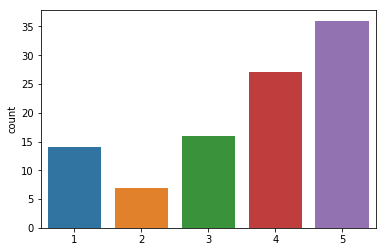

In [10]:
sns.countplot(ratings_from_dataset)

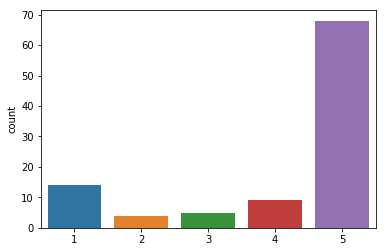

In [11]:
sns.countplot(ratings_from_sentiment)